# Assignment 2 (25%)

Due: Friday 11:55pm, Week 8

This assignment covers content taught in weeks 4-7. You may use any of the following programming languages;

* Python

* MATLAB

For Parts 2-5, marks will be evenly spread between;

* Code correctness

* Quality of plots/ figures

* Quality of analysis

Part 1 requires no coding, so marks will simply be divided equally between;

* Quality of plots/ figures

* Quality of analysis

You can submit your assignment in any form you like, as long as the results and analysis are clear, and the code is runnable. This includes, but is not limited to;

* A Python Notebook (.ipynb file) with analysis in docstrings or markdown
* A .m file with analyisis in comments
* A .zip file containing a combination of file types (.py, .ipynb, .m, .pdf, .png, .docx, etc...)

## Introduction 

Over the last few weeks we have explored numerous ways of modeling dynamical systems. In this assignment we will put these new skills to use. 


### Part 0 - Problem Selection

Select a problem to explore for the duration of this assignment. You can choose any of the coupled dynamical systems we examined in class, including (but not limited to); 
* The SEIR model for epidemic spread
* The Lotka-Volterra predator-prey model
* The coupled model for Guerrilla warfare

You may also design your own coupled dynamical model, exploring a problem you find personally interesting. 

Any student who develops their own coupled dynamical system to model, uses that system in this assignment, and gets their model approved by their tutors before the end of week 7, will receive a 10% bonus to their Assignment 2 grade. 


Social media influence coupled dynamical model

### Part 1 (2.5 marks) - Model Statement and Description

Express your coupled dynamical system as a set of difference equations.

Explain what these equations mean. What are the different components and how do they interact? Which constants can be tweaked? What assumptions have you made? You can use a flow chart or some other visualisation of the model in addition to the difference equations if it helps you explain the dynamics. 

This question is deliberately open ended. We want you to demonstrate your creativity and ability to justify your choices. 

The social media influence model is a coupled dynamical system that captures the interactions between users in a social media network. This model shows how a user's following, cummulative likes received for the posts made in a week and the number of posts made in said week affect each other. Consider a network of N users on a social media platform where a user has the following variables:

* $F_{t}$ : the number of followers at time t
* $L_{t}$ : the number of likes received at time t
* $P_{t}$ : the number of posts made at time t

These components are related through a set of difference equations:

* $F_{t+1}= F_{t}+ aL_{t}(1 - F/N)- bF_{t}+ cP_{t}$  --(1)

* $L_{t+1}= L_{t}+ dF_{t}- eL_{t}$         --(2)

* $P_{t+1}= P_{t}+ fF_{t}- gP_{t}$        --(3)

(1) The first equation represents the dynamics of the number of followers of user over time in a social media influence coupled dynamical system. The first term on the right-hand side of the equation, $F_{t}$, represents the current number of followers of user. The second term, $aL_{t}$, represents the impact of the number of likes received at time t on their number of followers at the next time step t+1. (1 - F/N) represents the fraction of the remaining capacity for new followers, and it decreases as F approaches N. This term causes the growth rate of F to decrease as it approaches the maximum capacity. The third term, $- bF_{t}$, represents the "decay" or "loss" of followers due to user's lack of activity or engagement on the platform. The fourth term, $cP_{t}$, represents the effect of user's activity on the platform, such as posting new content, on their number of followers.

(2) The second equation represents the dynamics of the number of likes received by the user over time in a social media influence coupled dynamical system. The first term on the right-hand side of the equation, $L_{t}$, represents the current number of likes received. The second term, $ dF_{t}$, represents the impact of the number of followers of user at time t on their number of likes at the next time step t+1. The third term, $- eL_{t}$, represents the "decay" or "loss" of likes due to lack of activity or engagement on the platform.

(3) The third equation represents the dynamics of the number of posts made by user i over time in a social media influence coupled dynamical system. The first term on the right-hand side of the equation, $P_{t}$, represents the current number of posts made by the user. The second term, $fF_{t}$, represents the impact of the number of followers of user at time t on their number of posts at the next time step t+1. This term captures the idea that users with more followers may feel more pressure or motivation to post more frequently. The third term, $- gP_{t}$, represents the "decay" or "loss" of posting activity due to user's lack of activity or engagement on the platform.

The constants that can be tweaked. To make the model simple, all constants range between 0 to 1: 
* a:rate at which followers are gained due to likes
* b:rate at which followers are lost
* c:effect of posts on engagement
* d:effect of followers on likes
* e:effect of inactivity on likes
* f:impact of followers on posts
* g:impact of inactivity on posts
* N:number of users on a social media platform


Assumptions made:
* Homogeneous user behavior: The model assumes that all users of the social media platform behave in the same way, and there is no differentiation between users based on demographics or other factors.

* Linear effects: The model assumes that the effects of the number of likes, inactivity, and post quality on follower gain, and the effects of the number of followers and inactivity on like retention, are linear. This may not be the case in reality, where these effects may be nonlinear or have threshold effects.

* No external factors: The model assumes that there are no external factors affecting the dynamics of the social media platform, such as changes in the user base, new features or policies implemented by the platform, or external events affecting user behavior.

* Instantaneous effects: The model assumes that the effects of changes in the number of likes, followers, and posts on each other are instantaneous, occurring at the end of each time interval. This may not be the case in reality, where these effects may take some time to manifest.

* Numerical values: The model assumes that the impact of user's influence, activity, quality of posts and popularity levels can be quantified and measured as numerical values


### Part 2 (4.5 marks) - Discrete Time Modelling

Now that you have set out your coupled dynamical system set out as a set of difference equations, lets try modeling the system in discrete time. 

Simulate the behaviour of your coupled dynamical system. Do so for a variety of initial conditions and model parameters. 

Plot and explain your results.

The model parameters will be tweaked for different types of users (normal user, influential user, inactive user)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Normal user

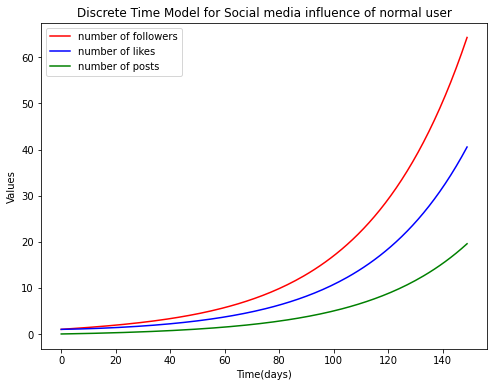

In [2]:
# Define the system parameters
a = 0.05
b = 0.01
c = 0.02
d = 0.03
e = 0.02
f = 0.01
g = 0.005
N = 1000000000

# Define the time step and the number of iterations
t = 1 #time step is 1day
N_i = 150

# Define the initial values of X, Y, and Z
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 1
L[0] = 1
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

This plot highlights the positive feedback loop between followers, likes, and posts, where each variable can positively influence the others. As the number of followers increases, the user is likely to feel more motivated to post more, which can generate more engagement in the form of likes, leading to even more followers. This feedback loop can lead to exponential growth in all three variables, which is reflected in the plot.

2. User with large influence (celebrity, influencer etc..)

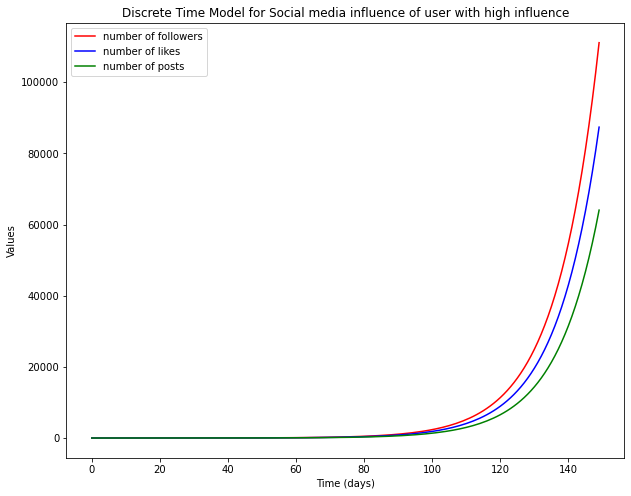

In [3]:
# Define the system parameters
a = 0.08
b = 0.01
c = 0.05
d = 0.08
e = 0.02
f = 0.05
g = 0.005
N=1000000000

# Define the time step and the number of iterations
t = 1
N_i = 150

# Define the initial values of X, Y, and Z
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 1
L[0] = 1
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of user with high influence')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()
plt.show()

The dynamical system presented allows us to analyze how different factors impact the growth of a user's social media presence. For a user with a larger influence, the parameters such as the rate at which followers are gained due to likes (a), the effect of posts on engagement (c), the impact of followers on likes (d), and the impact of followers on posts (f) are adjusted to be larger. This is because a user with a larger influence is likely to receive more likes and followers, leading to more followers gained per post and more likes received per post. Additionally, a user with a larger following may feel incentivized to post more often, which further increases their engagement.

The steepness of the plots for followers, likes, and posts for a user with larger influence compared to a normal user indicates that the former gains followers more rapidly and receives more likes per post, leading to more rapid growth overall. This aligns with the concept of a "rich get richer" phenomenon often observed in social media, where users with a larger following tend to accumulate followers and engagement more easily than those starting with a smaller following.

Overall, this analysis highlights how the parameters in the dynamical system can be adjusted to reflect different user scenarios and sheds light on the impact of a user's influence on their social media growth.


3. Inactive user

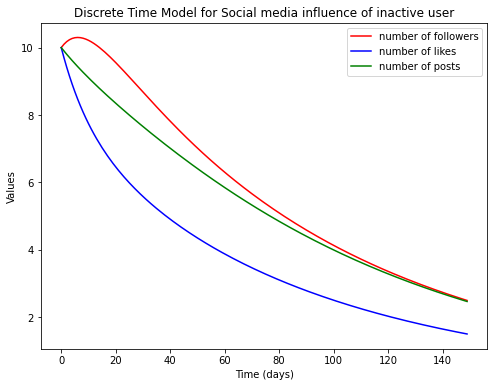

In [4]:
# Define the system parameters
a = 0.05
b = 0.06
c = 0.02
d = 0.03
e = 0.06
f = 0.01
g = 0.02
N=1000000000

# Define the time step and the number of iterations
t = 1
N_i = 150

# Define the initial values of X, Y, and Z
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 10
L[0] = 10
P[0] = 10

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of inactive user')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()
plt.show()

For an inactive user, the model parameters are adjusted to reflect their lack of engagement. For instance, the rate at which followers are lost (b), the effect of inactivity on likes (e), and the impact of inactivity on posts (g) are all set to be larger. This is because an inactive user is less likely to post, which leads to fewer likes and a loss of engagement on the platform, ultimately resulting in a decrease in social media followers.

The plot confirms this behavior, as we can see that the number of followers, likes, and posts are all decreasing simultaneously for an inactive user. This highlights the importance of consistent engagement on social media platforms, as a lack of activity can lead to a decline in one's online presence. It's worth noting that the model assumes that the user's inactivity is the only factor affecting their engagement on the platform, which may not always be the case in real-life scenarios. Nonetheless, the model provides valuable insights into the potential consequences of inactivity on social media.

Set different initial conditions for normal user:
1. Set $F_{0}$, $L_{0}$ and $P_{0}$ to 0
2. Set $F_{0}$ to 1,  $L_{0}$ and $P_{0}$ to 0
3. Set $L_{0}$ to 1,  $F_{0}$ and $P_{0}$ to 0
4. Set $P_{0}$ to 1,  $F_{0}$ and $L_{0}$ to 0

Set parameter N=10

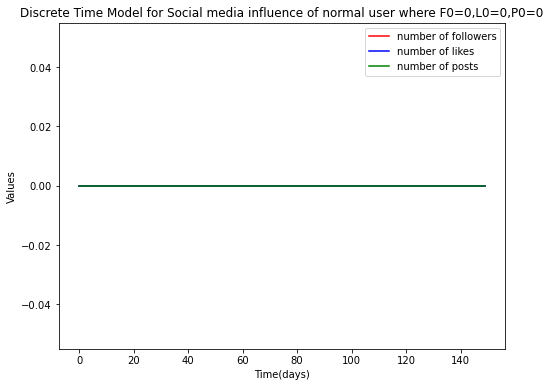

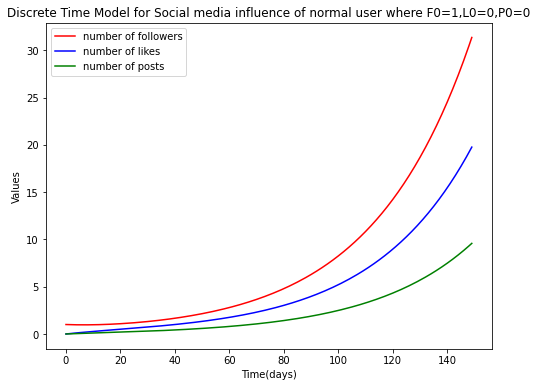

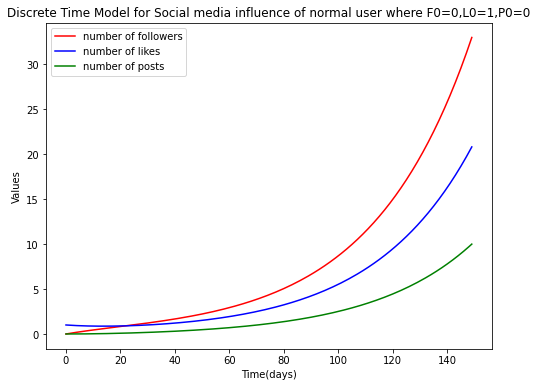

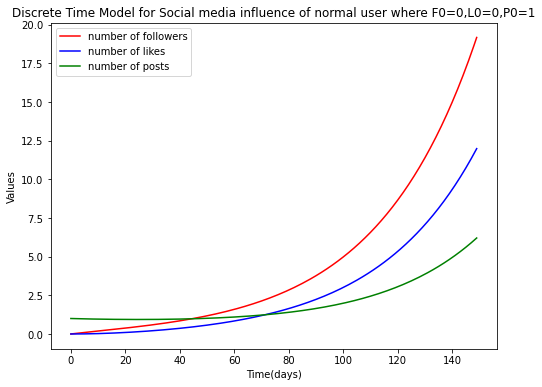

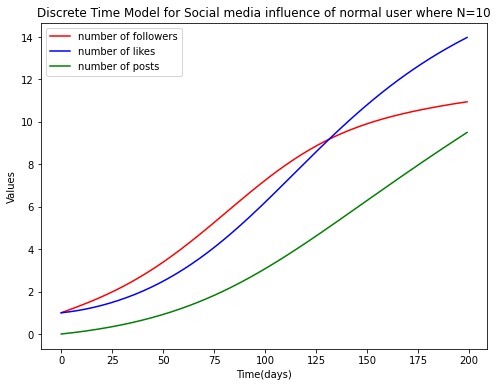

In [5]:
# Define the system parameters
a = 0.05
b = 0.01
c = 0.02
d = 0.03
e = 0.02
f = 0.01
g = 0.005
N=1000000000

# Define the time step and the number of iterations
t = 1 #time step is 1 day
N_i = 150

#First set of initial conditions
# Define the initial values of F, L, and P
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 0
L[0] = 0
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user where F0=0,L0=0,P0=0')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

#Second set of initial conditions
# Define the initial values of F, L, and P
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 1
L[0] = 0
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user where F0=1,L0=0,P0=0')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

#Third set of initial conditions
# Define the initial values of F, L, and P
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 0
L[0] = 1
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user where F0=0,L0=1,P0=0')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

#Forth set of initial conditions
# Define the initial values of F, L, and P
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 0
L[0] = 0
P[0] = 1

# Simulate the system using the difference equations
for i in range(1, N_i):
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user where F0=0,L0=0,P0=1')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

#When N=10
# Define the time step and the number of iterations
t = 1
N_i = 200

# Define the initial values of F, L, and P
F = np.zeros(N_i)
L = np.zeros(N_i)
P = np.zeros(N_i)
F[0] = 1
L[0] = 1
P[0] = 0

# Simulate the system using the difference equations
for i in range(1, N_i):
    N=10
    F[i] = F[i-1] + a*L[i-1]*(1 - (F[i-1]/N)) - b*F[i-1] + c*P[i-1]
    L[i] = L[i-1] + d*F[i-1] - e*L[i-1]
    P[i] = P[i-1] + f*F[i-1] - g*P[i-1]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(N_i)*t, F, label='number of followers', c='r')
plt.plot(np.arange(N_i)*t, L, label='number of likes', c='b')
plt.plot(np.arange(N_i)*t, P, label='number of posts', c='g')
plt.title('Discrete Time Model for Social media influence of normal user where N=10')
plt.xlabel('Time(days)')
plt.ylabel('Values')
plt.legend()
plt.show()

Looking at the plots above, we can see that if we set the initial values of F, L, and P to 0, these values will not increase over time. This indicates that there needs to be some initial engagement on the social media platform in order for the user to gain followers, likes, and increase their number of posts.

On the other hand, if the user starts with 1 follower, 1 like, or 1 post, their values will increase simultaneously with time. This indicates that there is a positive feedback loop between these variables, where an increase in one variable leads to an increase in the others. This behavior is commonly observed in social media platforms, where having a larger following can lead to more likes and a higher engagement rate, which in turn can attract more followers.

To examine the behaviour of the plot when the number of followers reaches the number of users on the social media platform, we set the number of users on a social media platform to 10 (N=10). From the plot, we can see that the rate at which followers are gained starts decreasing as it reaches 10. This is because the logistic term (1 - F/N) in equation (1) introduces a limiting factor to the growth of followers, which means that the rate of followers gained will decrease as the number of followers approaches the maximum capacity N. 


### Part 3 (6 marks) - Continuous Time Modelling

Let's see what happens if we move into continous time now. Express your system as a set of differential equations and once again, simulate the behaviour of your system. 

Do so for;
* multiple initial conditions
* multiple sets of model parameters
* at least two diferential equation solvers, including an RK2 implementation that should be included in this submission. 

Plot and explain your results, and be sure to point out any differences between discrete and continuous time that you notice. 


To model this system such that the maximum number of followers is N users, a new term is added to represent a limit on the growth of followers using logistic function.

(1 - F/N) represents the fraction of the remaining capacity for new followers, and it decreases as F approaches N. This term causes the growth rate of F to decrease as it approaches the maximum capacity.
The social influence model can be expressed using the following ODEs:

dF/dt = aL*(1 - F/N)  - bF + cP

dL/dt = dF - eL

dP/dt = fF - gP

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

## Solve_ivp

In [2]:

def SMI_generator(a,b,c,d,e,f,g,N):
    dFdt = lambda FLP: a*FLP[1]*(1 - (FLP[0]/N)) - b*FLP[0] + c*FLP[2]
    dLdt = lambda FLP: d*FLP[0] - e*FLP[1]
    dPdt = lambda FLP: f*FLP[0] - g*FLP[2]
    
    def SMI(t, y):
        return [dFdt(y), dLdt(y), dPdt(y)]
    
    return SMI

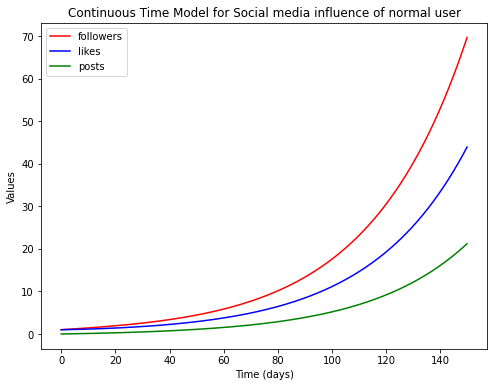

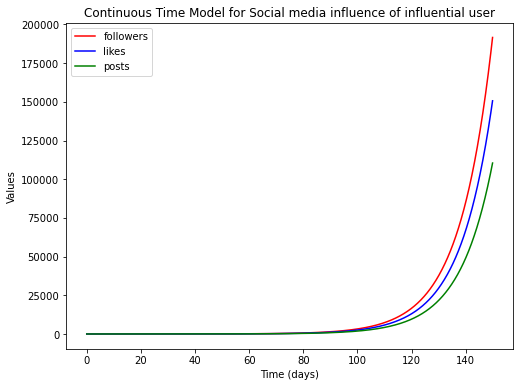

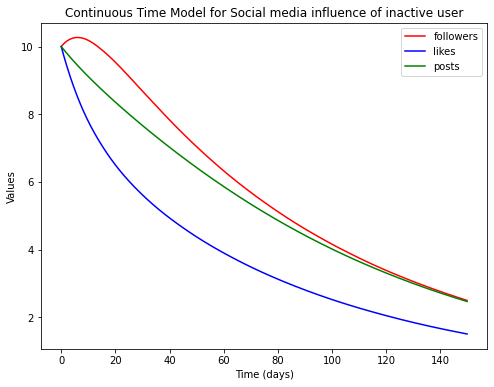

In [3]:
#normal user
params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005, 'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([1, 1, 0])
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

#influential user
params = {'a': 0.08, 'b': 0.01, 'c': 0.05, 'd': 0.08, 'e': 0.02, 'f': 0.05, 'g': 0.005, 'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([1, 1, 0])
t_eval = np.arange(0, 150, 0.1)
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of influential user')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

#inactive user
params = {'a': 0.05, 'b': 0.06, 'c': 0.02, 'd': 0.03, 'e': 0.06, 'f': 0.01, 'g': 0.02, 'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([10, 10, 10])
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of inactive user')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

Set different initial conditions for normal user:
1. Set $F_{0}$, $L_{0}$ and $P_{0}$ to 0
2. Set $F_{0}$ to 1,  $L_{0}$ and $P_{0}$ to 0
3. Set $L_{0}$ to 1,  $F_{0}$ and $P_{0}$ to 0
4. Set $P_{0}$ to 1,  $F_{0}$ and $L_{0}$ to 0


Set parameter N=10

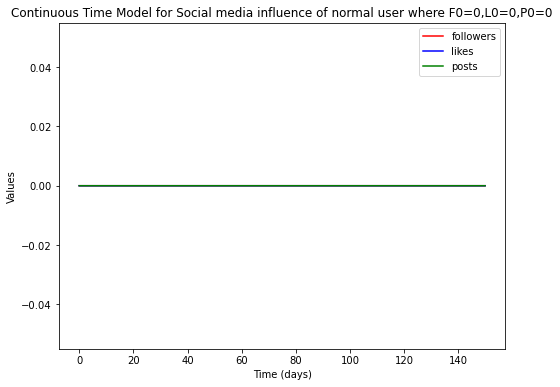

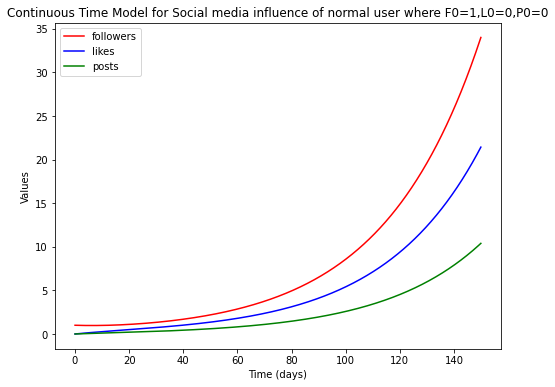

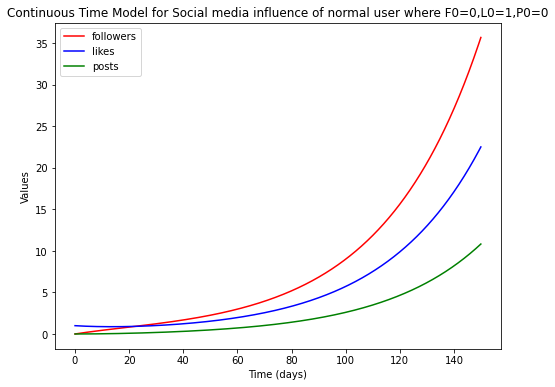

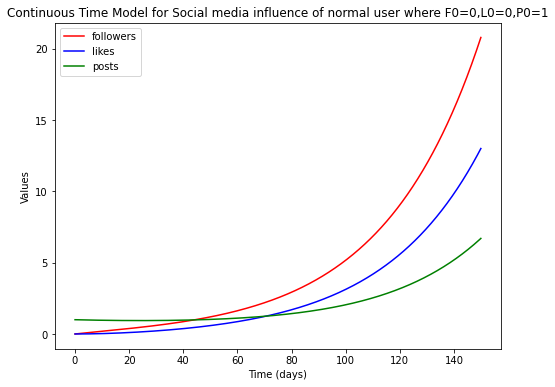

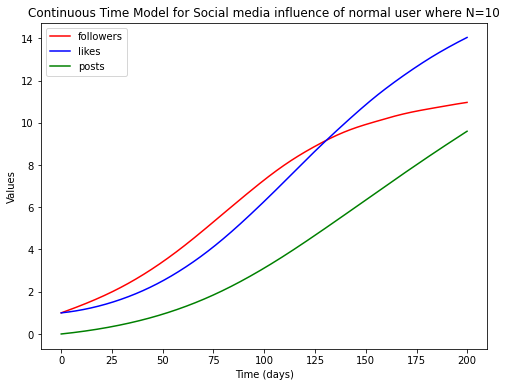

In [15]:
#First set of initial conditions
params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005, 'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([0, 0, 0])
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user where F0=0,L0=0,P0=0')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

#Second set of initial conditions
params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005,'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([1, 0, 0])
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user where F0=1,L0=0,P0=0')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

#Third set of initial conditions
params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005,'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([0, 1, 0])
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user where F0=0,L0=1,P0=0')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

#Forth set of initial conditions
params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005,'N': 1000000000}

SMI = SMI_generator(**params)
t_span = (0, 150)
y0 = np.array([0, 0, 1])
t_eval = np.arange(0, 150, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user where F0=0,L0=0,P0=1')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005,'N': 10}

SMI = SMI_generator(**params)
t_span = (0, 200)
y0 = np.array([1, 1, 0])
t_eval = np.arange(0, 200, 0.1)
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0, t_eval=t_eval)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(8, 6))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence of normal user where N=10')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

Upon examining the plots of the continuous-time model using solve_ivp, it can be seen that the shape and behavior of the system is very similar to that of the discrete-time model. This is because the numerical solver in solve_ivp uses methods such as the Runge-Kutta method to approximate the solution to the differential equations, which are based on a finite time step. As a result, the continuous function is approximated using discrete time steps.

However, there are some important differences between the continuous-time and discrete-time models. In the discrete-time model, the values of the variables are directly computed at each time step using the equations, whereas in the continuous-time model, the values are approximated at discrete time steps. This means that the values in the discrete-time model are exact, while those in the continuous-time model are approximations.

Furthermore, the solve_ivp function may introduce some error due to the step size and tolerance settings used in the function. A smaller time step and tighter tolerances can lead to a more accurate solution, but can also increase the computational time. Conversely, larger time steps and looser tolerances can lead to a faster computation, but at the cost of accuracy. For the plots shown, a time step of 0.1 was used for t_eval, but this can be adjusted to obtain a balance between computational efficiency and accuracy.

Overall, the numerical solver in solve_ivp provides an approximation to the continuous-time model, while the discrete-time model provides exact values at each time step. If a large time step is used in the continuous-time model, the plot may appear less smooth compared to the discrete-time model. However, by appropriately selecting the time step and tolerance settings, the solve_ivp function can be used to obtain an accurate approximation of the continuous-time model which can be observed from the plots above.


* Analysis for the behaviour and computational process of all the plot is the same as discrete models since the same sets of parameters and initial conditions are used (refer to part2)


## Rk2

In [10]:
def SMI_generator(a,b,c,d,e,f,g,N):
    def SMI(t, FLP):
        dFdt = a*FLP[1]*(1 - (FLP[0]/N)) - b*FLP[0] + c*FLP[2]
        dLdt = d*FLP[0] - e*FLP[1]
        dPdt = f*FLP[0] - g*FLP[2]
        return np.array([dFdt, dLdt, dPdt])
    return SMI

In [11]:
def RK2(df, y0, h, t0=0, a=1/2, t_max = 100, tol=1e-5, verbose=False):
    b = 1-a
    alpha = 1/(2*b)
    beta = alpha
    y, t = y0, t0 
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y={1}'.format(t, y))
        k1 = df(t, y)
        k2 = df(t+alpha*h, y+beta*h*k1)
        y = y + h*(a*k1+b*k2)        
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])
    return T, Y

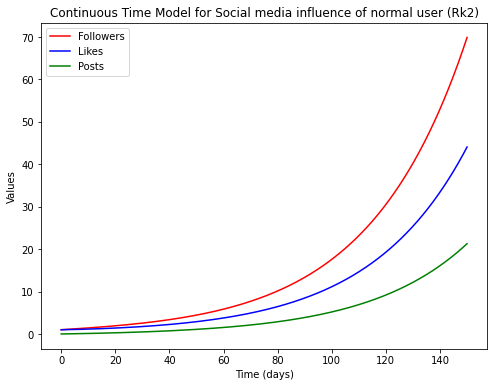

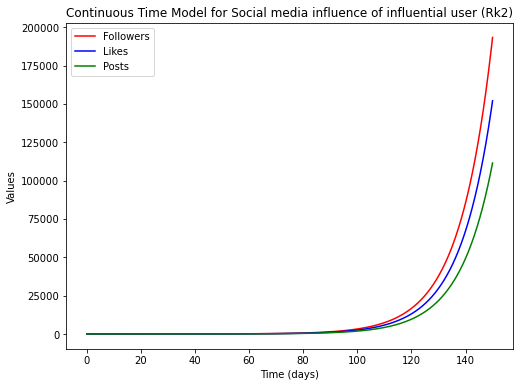

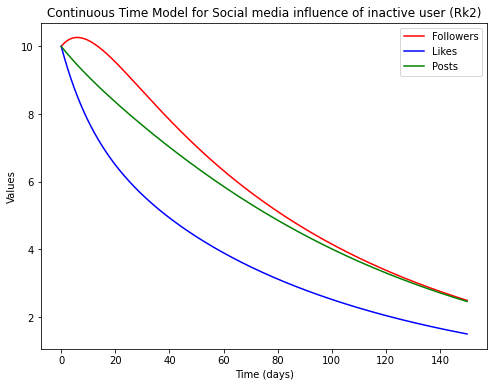

In [12]:
h = 0.01
a, b, c, d, e, f, g, N= 0.05, 0.01, 0.02, 0.03, 0.02, 0.01, 0.005,1000000000

SMI = SMI_generator(a, b, c, d, e, f, g, N)
SMI_0 = np.array([1, 1, 0])
A = 0.5
t, flp = RK2(df=SMI, y0=SMI_0, h=h, t0=0, a=A, t_max=150, tol=1e-5, verbose=False)
fig = plt.figure(figsize=(8, 6))
plt.plot(t, flp[:, 0], c='r', label='Followers')
plt.plot(t, flp[:, 1], c='b', label='Likes')
plt.plot(t, flp[:, 2], c='g', label='Posts')
plt.title('Continuous Time Model for Social media influence of normal user (Rk2)')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

h = 0.01
a, b, c, d, e, f, g, N= 0.08, 0.01, 0.05, 0.08, 0.02, 0.05, 0.005,1000000000

SMI = SMI_generator(a, b, c, d, e, f, g, N)
SMI_0 = np.array([1, 1, 0])
A = 0.5
t, flp = RK2(df=SMI, y0=SMI_0, h=h, t0=0, a=A, t_max=150, tol=1e-5, verbose=False)
fig = plt.figure(figsize=(8, 6))
plt.plot(t, flp[:, 0], c='r', label='Followers')
plt.plot(t, flp[:, 1], c='b', label='Likes')
plt.plot(t, flp[:, 2], c='g', label='Posts')
plt.title('Continuous Time Model for Social media influence of influential user (Rk2)')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

h = 0.01
a, b, c, d, e, f, g, N= 0.05, 0.06, 0.02, 0.03, 0.06, 0.01, 0.02,1000000000

SMI = SMI_generator(a, b, c, d, e, f, g, N)
SMI_0 = np.array([10, 10, 10])
A = 0.5
t, flp = RK2(df=SMI, y0=SMI_0, h=h, t0=0, a=A, t_max=150, tol=1e-5, verbose=False)
fig = plt.figure(figsize=(8, 6))
plt.plot(t, flp[:, 0], c='r', label='Followers')
plt.plot(t, flp[:, 1], c='b', label='Likes')
plt.plot(t, flp[:, 2], c='g', label='Posts')
plt.title('Continuous Time Model for Social media influence of inactive user (Rk2)')
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.legend()

Note: Plots for multiple initial conditions are not plotted as we just needed to observe the difference between Rk2 and solve_ivp 

We have used the Rk2 method to solve the differential equation for different sets of parameters, which resulted in plots similar to those obtained using the solve_ivp method. The Rk2 method is a second-order explicit numerical method that uses a fixed step size to approximate the solution at each time step. It works by computing two approximations of the solution, one at the beginning and one at the midpoint of the time step, and then combining them to obtain a more accurate approximation.

The solve_ivp method is a more general and flexible method that can handle a wider range of differential equations than Rk2. It also has the advantage of adaptive time-stepping, where the step size is adjusted automatically based on the behavior of the solution. This can lead to more accurate solutions with less computational time compared to a fixed-step method like Rk2.

While solve_ivp is generally more powerful and versatile than Rk2, it can also be more computationally intensive, especially for large systems of equations or for problems that require high accuracy. In contrast, Rk2 is a simpler and more straightforward method that can be faster and more efficient than solve_ivp for certain types of problems, particularly when the solution is not too sensitive to small changes in the step size.

Therefore, the choice between Rk2 and solve_ivp depends on the specific requirements of the problem at hand. If the problem involves a complex system of equations or requires high accuracy, solve_ivp may be the better choice. However, if the problem is simple and does not require high accuracy, Rk2 may be a more efficient and transparent option.

In this case, Rk2 is sufficient to solve this system of equations.


### Part 4 (6 marks) - Stochastic Modelling

Until now we have assumed that all events occur deterministically. Lets add some randomness to our system and see what happens. 

Implement a Gillespie Algorithm version of your solver and simulate the behaviour of your system. 

As usual, make sure to do so for multiple sets of initial conditions and model parameters. 

Plot and explain your results. In particular, how does the addition of randomness affect your results? 


For this question, 2 sets of initial conditions (F=0,L=0,P=0)&(F=1,L=1,P=0) and 3 sets of model parameters (normal user, influential user, N=1000) were chosen

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def gillespie(events, event_consequences, Y0, t0, t_max):
    t, y = t0, Y0
    T, Y = [t], [y]
    while t < t_max:
        p = [event(t, y) for event in events]
        if sum(p) == 0:
            p_rel = np.ones(len(p))/len(p)  # equal probability for all events
        else:
            p_rel = p/sum(p)
        tte = [time_to_event(p[i]) for i in range(len(p))]
        idx = np.random.choice(range(len(p)), p=p_rel)
        event, dt = event_consequences[idx], tte[idx]
        y = event(t, y)
        t += dt
        T.append(t)
        Y.append(y)
    return np.array(T), np.array(Y)

time_to_event = lambda p: (-1/p)*np.log(np.random.random()) if p > 0 else np.inf
def propensities(t, y, events):
    e_ = []
    for event in events:
        e = event(t=t, y=y)
        e_.append(e)
    return e_

### Events

1. gain follower due to likes
2. lose follower due to inactivity
3. gain follower due to posts
4. gain likes due to followers
5. lose likes due to inactivity
6. creates a post
7. creates one post less

In [19]:
def SMI_generator(a,b,c,d,e,f,g):
    dFdt = lambda FLP: a*FLP[1]*(1 - (FLP[0]/N)) - b*FLP[0] + c*FLP[2]
    dLdt = lambda FLP: d*FLP[0] - e*FLP[1]
    dPdt = lambda FLP: f*FLP[0] - g*FLP[2]

In [20]:
N, a, b, c, d, e, f, g = 10000000000000, 0.5, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05

follower_like = lambda t, y: a*y[1]*(1 - (y[0]/N))
follower_inactive = lambda t, y: b*y[0]
follower_post = lambda t, y: c*y[2]
like_follower = lambda t, y: d*y[0]
like_inactive = lambda t, y: e*y[1]
post = lambda t, y: f*y[0]
post_less = lambda t, y: g*y[2]

follower_like_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
follower_inactive_delta = lambda t, y: np.array([y[0]-1, y[1], y[2]]) #F=F-1
follower_post_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
like_follower_delta = lambda t, y: np.array([y[0], y[1]+1, y[2]]) #L=L+1
like_inactive_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]]) #L=L-1
post_delta = lambda t, y: np.array([y[0], y[1], y[2]+1]) #P=P+1
post_less_delta = lambda t, y: np.array([y[0], y[1], y[2]-1]) #P=P-1

events = [follower_like, follower_inactive, follower_post, like_follower, like_inactive, post, post_less]
event_consequences = [follower_like_delta, follower_inactive_delta, follower_post_delta, 
                      like_follower_delta, like_inactive_delta, post_delta, post_less_delta]

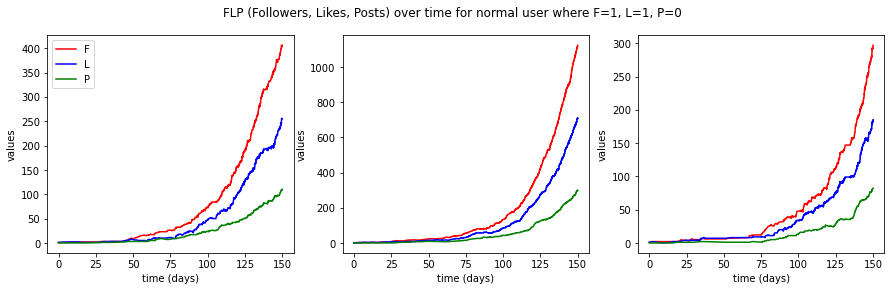

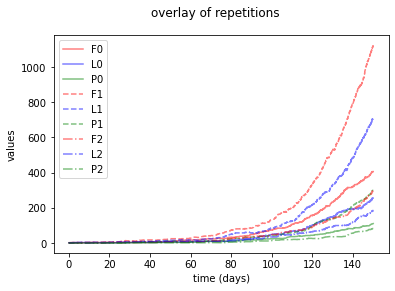

In [21]:

hyperparameters = {'N': N, 'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g}

y0 = np.array([1,1,0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.']
colors = ['r', 'b', 'g']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['F', 'L', 'P']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (days)')
    axs[rep].set_ylabel('values')

fig.suptitle('FLP (Followers, Likes, Posts) over time for normal user where F=1, L=1, P=0')
axs[0].legend()

fig2.suptitle('overlay of repetitions')
axs2.set_xlabel('time (days)')
axs2.set_ylabel('values')
axs2.legend()


Looking at the plot for overlay of repetitions for normal users, the addition of randomness gives a plot of similar shape compared to the discrete and continous plots for normal users, i.e. the number of followers, likes, and posts are increasing exponentially with time. However, the plots appear to be less smooth which might be due to randomness introduced. 

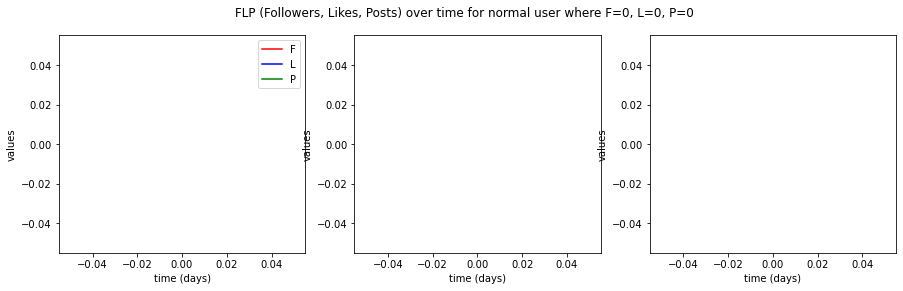

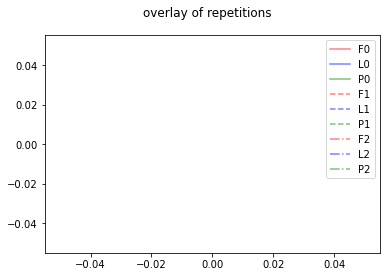

In [22]:
N, a, b, c, d, e, f, g = 10000000000000, 0.5, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05


follower_like = lambda t, y: a*y[1]*(1 - (y[0]/N))
follower_inactive = lambda t, y: b*y[0]
follower_post = lambda t, y: c*y[2]
like_follower = lambda t, y: d*y[0]
like_inactive = lambda t, y: e*y[1]
post = lambda t, y: f*y[0]
post_less = lambda t, y: g*y[2]

follower_like_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
follower_inactive_delta = lambda t, y: np.array([y[0]-1, y[1], y[2]]) #F=F-1
follower_post_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
like_follower_delta = lambda t, y: np.array([y[0], y[1]+1, y[2]]) #L=L+1
like_inactive_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]]) #L=L-1
post_delta = lambda t, y: np.array([y[0], y[1], y[2]+1]) #P=P+1
post_less_delta = lambda t, y: np.array([y[0], y[1], y[2]-1]) #P=P-1

events = [follower_like, follower_inactive, follower_post, like_follower, like_inactive, post, post_less]
event_consequences = [follower_like_delta, follower_inactive_delta, follower_post_delta, 
                      like_follower_delta, like_inactive_delta, post_delta, post_less_delta]


hyperparameters = {'N': N, 'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g}

y0 = np.array([0,0,0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.']
colors = ['r', 'b', 'g']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['F', 'L', 'P']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (days)')
    axs[rep].set_ylabel('values')

fig.suptitle('FLP (Followers, Likes, Posts) over time for normal user where F=0, L=0, P=0')
axs[0].legend()

fig2.suptitle('overlay of repetitions')
axs2.legend()


Setting the initial parameters to 0 for F, L, and P, the values remain constant over time, indicating that there needs to be some initial engagement on the social media platform for a user to gain followers, likes, and increase their number of posts. This observation is consistent across both the discrete and continuous plots, indicating that the behavior of the system is the same when randomness introduced. Therefore, it is crucial to have some initial activity or content in order to attract followers and create engagement on the platform.

In [23]:
N, a, b, c, d, e, f, g = 10000000000000, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.05


follower_like = lambda t, y: a*y[1]*(1 - (y[0]/N))
follower_inactive = lambda t, y: b*y[0]
follower_post = lambda t, y: c*y[2]
like_follower = lambda t, y: d*y[0]
like_inactive = lambda t, y: e*y[1]
post = lambda t, y: f*y[0]
post_less = lambda t, y: g*y[2]

follower_like_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
follower_inactive_delta = lambda t, y: np.array([y[0]-1, y[1], y[2]]) #F=F-1
follower_post_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
like_follower_delta = lambda t, y: np.array([y[0], y[1]+1, y[2]]) #L=L+1
like_inactive_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]]) #L=L-1
post_delta = lambda t, y: np.array([y[0], y[1], y[2]+1]) #P=P+1
post_less_delta = lambda t, y: np.array([y[0], y[1], y[2]-1]) #P=P-1

events = [follower_like, follower_inactive, follower_post, like_follower, like_inactive, post, post_less]
event_consequences = [follower_like_delta, follower_inactive_delta, follower_post_delta, 
                      like_follower_delta, like_inactive_delta, post_delta, post_less_delta]

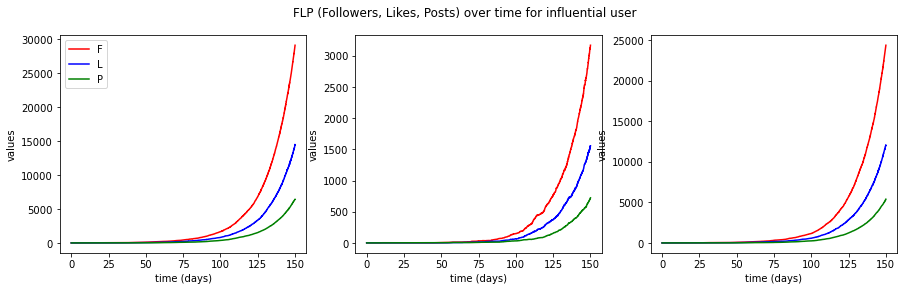

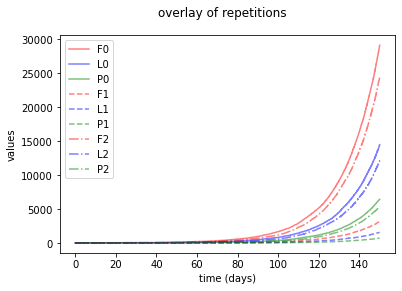

In [24]:

hyperparameters = {'N': N, 'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g}

y0 = np.array([1,1,0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.']
colors = ['r', 'b', 'g']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['F', 'L', 'P']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (days)')
    axs[rep].set_ylabel('values')

fig.suptitle('FLP (Followers, Likes, Posts) over time for influential user')
axs[0].legend()

fig2.suptitle('overlay of repetitions')
axs2.set_xlabel('time (days)')
axs2.set_ylabel('values')
axs2.legend()


The plot for influential user shows a steeper growth curve compared to the plot for normal user. This suggests that influential users have a greater impact on the growth of the system than normal users. By adding randomness to the model, we can capture the behavior of the system accurately, even after tweaking the model parameters. 

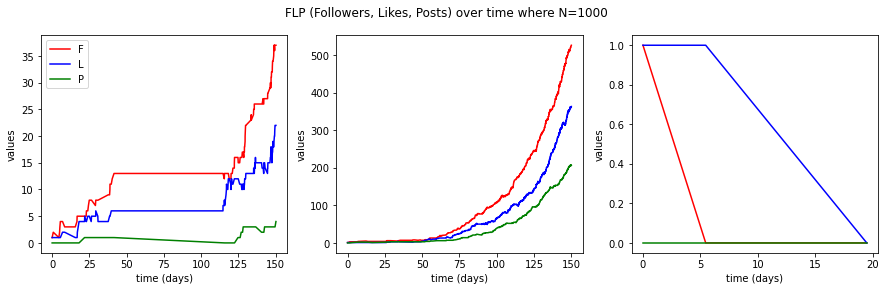

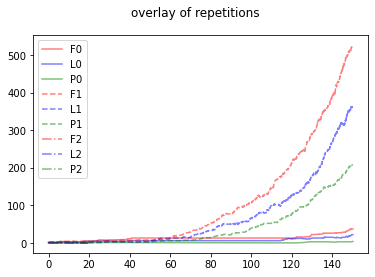

In [43]:
N, a, b, c, d, e, f, g = 1000, 0.5, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05


follower_like = lambda t, y: a*y[1]*(1 - (y[0]/N))
follower_inactive = lambda t, y: b*y[0]
follower_post = lambda t, y: c*y[2]
like_follower = lambda t, y: d*y[0]
like_inactive = lambda t, y: e*y[1]
post = lambda t, y: f*y[0]
post_less = lambda t, y: g*y[2]

follower_like_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
follower_inactive_delta = lambda t, y: np.array([y[0]-1, y[1], y[2]]) #F=F-1
follower_post_delta = lambda t, y: np.array([y[0]+1, y[1], y[2]]) #F=F+1
like_follower_delta = lambda t, y: np.array([y[0], y[1]+1, y[2]]) #L=L+1
like_inactive_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]]) #L=L-1
post_delta = lambda t, y: np.array([y[0], y[1], y[2]+1]) #P=P+1
post_less_delta = lambda t, y: np.array([y[0], y[1], y[2]-1]) #P=P-1

events = [follower_like, follower_inactive, follower_post, like_follower, like_inactive, post, post_less]
event_consequences = [follower_like_delta, follower_inactive_delta, follower_post_delta, 
                      like_follower_delta, like_inactive_delta, post_delta, post_less_delta]


hyperparameters = {'N': N, 'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g}

y0 = np.array([1,1,0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.']
colors = ['r', 'b', 'g']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['F', 'L', 'P']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (days)')
    axs[rep].set_ylabel('values')

fig.suptitle('FLP (Followers, Likes, Posts) over time where N=1000')
axs[0].legend()

fig2.suptitle('overlay of repetitions')
axs2.legend()


The plot shows a more chaotic behaviour when the parameter N=1000. When N is set to 100, a ValueError is returned stating that probabilities are not non-negative. This might be due to lack of samples to choose from when the maximum number of followers is reached. 

When the parameter N is set to a smaller value, such as 100, there are fewer potential followers to choose from, which could lead to the system reaching a maximum number of followers more quickly. This could cause the algorithm to encounter probabilities that are not non-negative, leading to a ValueError. On the other hand, when the parameter N is increased to 1000, there are more potential followers to choose from, leading to a more chaotic behavior in the system. This could be due to the increased randomness introduced by the Gillespie algorithm, which models the behavior of systems with random fluctuations.



The overlay of repetitions plot for the Gillespie algorithm displays multiple time series data generated by running the algorithm with different random number seeds on the same graph. This helps visualize the inherent variability and randomness in stochastic simulations and detect patterns and trends in the data. By analyzing how the system behaves under varying initial conditions or parameter values, we can observe the effects of variability on its overall dynamics.

The plot's shape is similar to those obtained from discrete and continuous models, indicating that the number of followers, likes, and posts increases exponentially with time. However, the introduction of randomness causes fluctuations in the data, leading to a less smooth plot.

The Gillespie algorithm is a stochastic simulation algorithm that can accurately model systems with random fluctuations. Randomness enables the algorithm to capture the impact of unforeseeable events such as sudden changes in user behavior or external factors affecting social media activity. However, the variability introduced by randomness may necessitate multiple repetitions of the simulation to obtain a reliable estimate of system behavior.

In conclusion, the overlay of repetitions plot provides valuable insights into the system's behavior over time in the presence of random fluctuations. Although less deterministic than deterministic models, these results offer a more comprehensive understanding of system dynamics that can be useful in real-world applications.

### Part 5 (6 marks) - Steady State Analysis

Some dynamical systems will eventually converge to a steady state, where the rate of change for each compartment is 0. 

Does your model have any steady states? If so, where are they located? How stable are they? Why?

We have seen a number of methods for analysing steady states, including;
* Cobwebbing
* Phase Plane Analysis
* Linearisation about the steady state
* Local stability analysis
* Plotting the dynamics with a very long time horizon

Consider which of these techniques are appropriate to apply when analysing your model's steady states. Justify your use (or lack of use) of said methods, and explain what your results mean. 

To analyse the steady state of this system, Local stability analysis and Plotting the dynamics with a very long time horizon can be a good combination to use for analyzing the behavior of the system over time and the stability properties of the steady state.

Local stability analysis allows us to examine the eigenvalues of the Jacobian matrix evaluated at the steady state to determine whether the steady state is stable, unstable or semi-stable. This method provides a quantitative measure of the stability of the steady state.

Plotting the dynamics with a very long time horizon can provide information on the long-term behavior of the system and help us understand how it evolves from its initial conditions. This method can help us identify any oscillations, periodic solutions, or convergence to a steady state.

Together, these two methods can provide a comprehensive analysis of the stability properties of the steady state and the behavior of the system over time.

### Plotting the dynamics with a very long time horizon

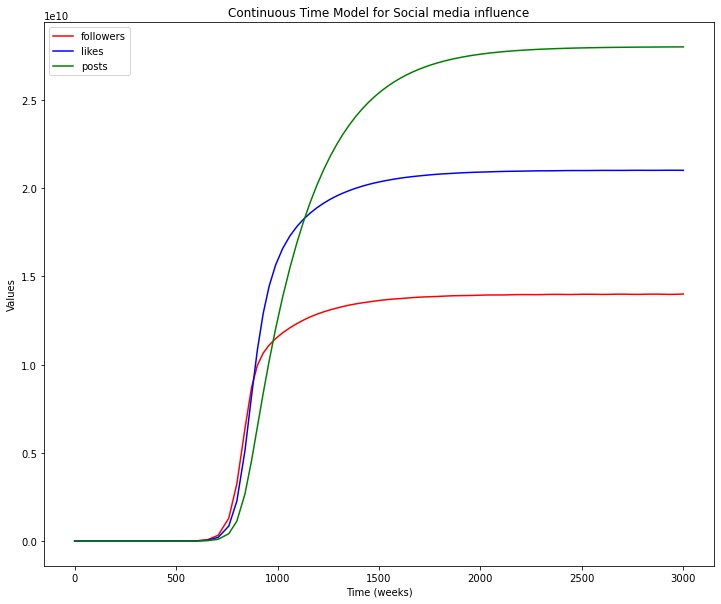

In [36]:
N=10000000000
def SMI_generator(a,b,c,d,e,f,g):
    dFdt = lambda FLP: a*FLP[1]*(1 - (FLP[0]/N)) - b*FLP[0] + c*FLP[2]
    dLdt = lambda FLP: d*FLP[0] - e*FLP[1]
    dPdt = lambda FLP: f*FLP[0] - g*FLP[2]
    
    def SMI(t, y):
        return [dFdt(y), dLdt(y), dPdt(y)]
    
    return SMI

params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005}
SMI = SMI_generator(**params)
t_span = (0, 3000)
y0 = np.array([1, 1, 0])
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(12, 10))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence')
plt.xlabel('Time (weeks)')
plt.ylabel('Values')
plt.legend()

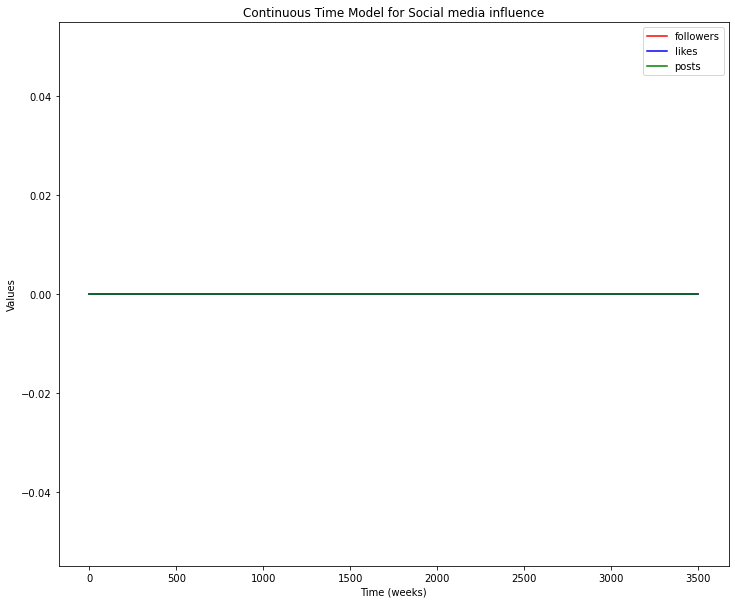

In [27]:
N=10000000000
def SMI_generator(a,b,c,d,e,f,g):
    dFdt = lambda FLP: a*FLP[1]*(1 - (FLP[0]/N)) - b*FLP[0] + c*FLP[2]
    dLdt = lambda FLP: d*FLP[0] - e*FLP[1]
    dPdt = lambda FLP: f*FLP[0] - g*FLP[2]
    
    def SMI(t, y):
        return [dFdt(y), dLdt(y), dPdt(y)]
    
    return SMI

params = {'a': 0.05, 'b': 0.01, 'c': 0.02, 'd': 0.03, 'e': 0.02, 'f': 0.01, 'g': 0.005}
SMI = SMI_generator(**params)
t_span = (0, 3500)
y0 = np.array([0, 0, 0])
bunch = solve_ivp(fun=SMI, t_span=t_span, y0=y0)
t = bunch['t']
F, L, P = bunch['y']
fig = plt.figure(figsize=(12, 10))
plt.plot(t, F, label='followers', c='r')
plt.plot(t, L, label='likes', c='b')
plt.plot(t, P, label='posts', c='g')
plt.title('Continuous Time Model for Social media influence')
plt.xlabel('Time (weeks)')
plt.ylabel('Values')
plt.legend()

Plotting the dynamics with a long time horizon, long enough such that the rate of change for each compartment is 0, i.e. no changes in the values for following, posts, and likes in the system provides useful insights into the behavior of the system over time. By observing the trends in the plots for followers, likes, and posts, we can see that they reach an equilibrium state due to the logistic term (1 - F/N) when F/N > 1 introduces a limiting factor to the growth of followers. The system can reach a steady state due to a balance between the growth and decay processes, not just because of the limiting factor. The limiting factor simply ensures that the steady state is finite.

We can also see from the second plot that if the intial values for following, likes and posts are 0, the system won't change over time. This indicates that if the system starts of with the initial values of F, L, and P being 0, it won't change over time which means (0,0,0) is a steady state. However, it's important to note that this method may not provide us with a complete understanding of the stability properties of the steady state.

To further analyze the stability properties of the steady state, we can examine the eigenvalues of the Jacobian matrix evaluated at the steady state. If all eigenvalues have negative real parts, the steady state is stable and the system will converge towards it. On the other hand, if at least one eigenvalue has a positive real part, the steady state is unstable, and the system will diverge away from it.

Therefore, to fully understand the stability properties of the steady state for the given system, we need to evaluate the Jacobian matrix and determine the eigenvalues. We can then use this information to determine whether the steady state is stable or unstable.

### Local stability analysis

In [29]:
# Parameters
a = 0.05
b = 0.01
c = 0.02
d = 0.03
e = 0.02
f = 0.01
g = 0.005
N = 10000000000


# Find steady state
F_star = 0
L_star = 0
P_star = 0

# Compute Jacobian matrix
J = np.array([[(-a*L_star)/N, a*(1 - F_star/N), c],
              [d, -e, 0],
              [f, 0, -g]])

# Compute eigenvalues of Jacobian matrix
eigvals = np.linalg.eigvals(J)

# Print eigenvalues
print(eigvals)

[-0.05166182  0.03333878 -0.00667695]


The sign of the real part of the eigenvalues tells us about the local stability of the system near the steady state. If all eigenvalues have negative real parts, then the steady state is stable and nearby trajectories will converge to it over time. If any eigenvalue has a positive real part, then the steady state is unstable and nearby trajectories will diverge away from it over time.

The output [-0.05166182 0.03333878 -0.00667695] is the set of eigenvalues of the Jacobian matrix evaluated at the steady state (0,0,0) of the given system of differential equations.

Since there is a a positive eigenvalue in the Jacobian matrix, this indicates that the steady state is unstable in at least one direction. The positive eigenvalue means that the system is experiencing exponential growth in one direction, which will cause nearby trajectories to diverge away from the steady state over time. Therefore, the system is not attracted towards the steady state but instead moves away from it. 

This system has 1 unstable steady state which is (0,0,0). This makes sense because the system will diverge away from this steady state over time due to the fluctuations of number of followers, likes and posts.The system has one unstable steady state, which means that the number of followers, likes, and posts will not converge to zero over time. The stability of the steady state depends on the values of the parameters, so it's important to choose them carefully to ensure that the system behaves as desired.

I also noticed that tweaking the model parameters could cause the system to converge to 0 over time, i.e. for inactive users. In general, the system will only converge to 0 if the rate of decay or loss of followers, likes, and posts is greater than the rate of growth. If the parameters are such that the rate of growth is always greater than the rate of decay, then the system will not converge to 0. If the system converges to (0,0,0) over time for a specific set of parameter values, then (0,0,0) can be considered a stable steady state for those parameter values. However, for other parameter values, the system may not converge to (0,0,0) and may exhibit different behaviors. Therefore, the stability of the steady state depends on the values of the parameters, and it's important to analyze the system for different parameter values to determine the stability of the steady state.

However, it's important to note that local stability does not necessarily imply global stability. The stability of the steady state will depend on the values of the parameters a, c, e, f, and g. If any of these parameters change, the stability of the steady state may also change.

## Methods not used:
### Cobwebbing

Cobwebbing may be more difficult to visualize and analyze the results since it would require a 3-dimensional plot. I could however plot two of the variables against each other and use different colors or markers to represent the third variable. This approach can help to visualize the behavior of the system, but it may not provide a complete picture.

Cobwebbing also cannot be used to analyze a system with a single steady state point, because it is a method used to study the behavior of systems that exhibit oscillatory or divergent behavior.

In a system with a single steady state point, there are no oscillations or divergences, and the behavior of the system is determined by the stability of the steady state. Specifically, if the steady state is stable, then the system will approach the steady state over time, and if it is unstable, then the system will move away from the steady state.


### Phase Plane Analysis
Phase Plane Analysis can become difficult to perform for complex systems with more than two state variables. The behavior of the system also depends on the initial conditions, and small variations in these conditions can lead to significantly different outcomes. This can make it difficult to generalize the results obtained from the analysis.

### Linearisation about the steady state
Linearisation about the steady state assumes that the system is approximately linear in the vicinity of the steady state. However, this may not be the case for all systems, and important features such as nonlinearities and feedback loops may be missed.

Linearisation about the steady state assumes that the steady state is stable, and may give incorrect results if the steady state is actually unstable. This could be a problem for our system as the steady state is unstable.